<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/Copy_of_TTR_estrazione_features_PCA_LDA_da_jpg_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estrazione delle features tramite PCA e LDA da un set di immagini nwh (num, larg, alt) (Greyscale)

valutazione della varianza dei dati con PCA

randomforest per comparare l'accuratezza tra PCA e LDA

In [ ]:
# Scarico i file delle varie classi di immagini jpg
#train
!wget https://www.dropbox.com/s/asr619m9pigl2hh/train_angry.zip?dl=0
!wget https://www.dropbox.com/s/uy95xax12bug0df/train_disgust.zip?dl=0
!wget https://www.dropbox.com/s/hsdhrpgk2o3h95b/train_fear.zip?dl=0
!wget https://www.dropbox.com/s/6hlkk4y9b4e6oef/train_happy.zip?dl=0
!wget https://www.dropbox.com/s/lqvzefuiyb3nr6p/train_neutral.zip?dl=0
!wget https://www.dropbox.com/s/4xj4dfhh6nd88uq/train_sad.zip?dl=0
!wget https://www.dropbox.com/s/nfphtfuezqs6930/train_surprise.zip?dl=0

!unzip train_angry.zip?dl=0
!unzip train_disgust.zip?dl=0
!unzip train_fear.zip?dl=0
!unzip train_happy.zip?dl=0
!unzip train_neutral.zip?dl=0
!unzip train_sad.zip?dl=0
!unzip train_surprise.zip?dl=0

# Scarico file di test
!wget https://www.dropbox.com/s/zy4caktxitsk2nd/test_angry.zip?dl=0
!wget https://www.dropbox.com/s/gfeos1j8akykpps/test_disgust.zip?dl=0
!wget https://www.dropbox.com/s/7zg9lsbppy0aprf/test_fear.zip?dl=0
!wget https://www.dropbox.com/s/w2pjbyvh0x8s2zj/test_happy.zip?dl=0
!wget https://www.dropbox.com/s/ca86hlz8tkgjl70/test_neutral.zip?dl=0
!wget https://www.dropbox.com/s/p85mypgujhmfq26/test_sad.zip?dl=0
!wget https://www.dropbox.com/s/sp7975d2art8ivt/test_surprise.zip?dl=0
!unzip test_angry.zip?dl=0
!unzip test_disgust.zip?dl=0
!unzip test_fear.zip?dl=0
!unzip test_happy.zip?dl=0
!unzip test_neutral.zip?dl=0
!unzip test_sad.zip?dl=0
!unzip test_surprise.zip?dl=0

Streaming output truncated to the last 5000 lines.
 extracting: test_happy/PrivateTest_22689070.jpg  
 extracting: test_happy/PrivateTest_22929697.jpg  
 extracting: test_happy/PrivateTest_22938435.jpg  
 extracting: test_happy/PrivateTest_22979298.jpg  
 extracting: test_happy/PrivateTest_2309763.jpg  
 extracting: test_happy/PrivateTest_23250597.jpg  
 extracting: test_happy/PrivateTest_23282756.jpg  
 extracting: test_happy/PrivateTest_23344981.jpg  
 extracting: test_happy/PrivateTest_23400117.jpg  
 extracting: test_happy/PrivateTest_2352334.jpg  
 extracting: test_happy/PrivateTest_23574753.jpg  
 extracting: test_happy/PrivateTest_23578691.jpg  
 extracting: test_happy/PrivateTest_23631554.jpg  
 extracting: test_happy/PrivateTest_23782289.jpg  
 extracting: test_happy/PrivateTest_23900877.jpg  
 extracting: test_happy/PrivateTest_2390435.jpg  
 extracting: test_happy/PrivateTest_23955431.jpg  
 extracting: test_happy/PrivateTest_24030799.jpg  
 extracting: test_happy/PrivateTes

In [ ]:
from glob import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import seaborn as sns

# LISTE DI IMMAGINI jpg
# Raccolgo le immagini di uno specifico insieme (espressione del viso)
# creando una lista di immagini contenenti solo immagini di quell'insieme
# train
list_train_angry_images = sorted(glob('train_angry/*.jpg'))
list_train_disgust_images = sorted(glob('train_disgust/*.jpg'))
list_train_fear_images = sorted(glob('train_fear/*.jpg'))
list_train_happy_images = sorted(glob('train_happy/*.jpg'))
list_train_neutral_images = sorted(glob('train_neutral/*.jpg'))
list_train_sad_images = sorted(glob('train_sad/*.jpg'))
list_train_surprise_images = sorted(glob('train_surprise/*.jpg'))

# test
list_test_angry_images = sorted(glob('test_angry/*.jpg'))
list_test_disgust_images = sorted(glob('test_disgust/*.jpg'))
list_test_fear_images = sorted(glob('test_fear/*.jpg'))
list_test_happy_images = sorted(glob('test_happy/*.jpg'))
list_test_neutral_images = sorted(glob('test_neutral/*.jpg'))
list_test_sad_images = sorted(glob('test_sad/*.jpg'))
list_test_surprise_images = sorted(glob('test_surprise/*.jpg'))

In [ ]:
import sys
from numpy import save

# riunisco in un unica lista train e in un unica lista test le varie classi train e test (liste di immagini)
list_train_images = [*list_train_angry_images,*list_train_disgust_images,*list_train_fear_images,*list_train_happy_images,*list_train_neutral_images,*list_train_sad_images,*list_train_surprise_images]
list_test_images = [*list_test_angry_images,*list_test_disgust_images,*list_test_fear_images,*list_test_happy_images,*list_test_neutral_images,*list_test_sad_images,*list_test_surprise_images]

# trasformo le liste di immagini in liste di immagini nwh       
list_train_images_nwh = []
for i in range(len(list_train_images)):
  list_train_images_nwh.append(cv2.imread(list_train_images[i], cv2.IMREAD_GRAYSCALE))

list_test_images_nwh = []
for i in range(len(list_test_images)):
  list_test_images_nwh.append(cv2.imread(list_test_images[i], cv2.IMREAD_GRAYSCALE))


In [ ]:
print(np.shape(list_train_images_nwh))
print(np.shape(list_test_images_nwh))

(31805, 48, 48)
(7178, 48, 48)


In [ ]:
# trasformo le liste in array
array_train_images_nwh = np.array(list_train_images_nwh)
array_test_images_nwh = np.array(list_test_images_nwh)

In [ ]:
print(np.shape(array_train_images_nwh))
print(np.shape(array_test_images_nwh))
print("train")
print(array_train_images_nwh[2])
print("test")
print(array_test_images_nwh[2])

(31805, 48, 48)
(7178, 48, 48)
train
[[255 255 255 ...  76  90  88]
 [255 255 255 ...  80  92  85]
 [255 255 255 ...  90  93  92]
 ...
 [ 28  24  31 ...  39  40  30]
 [ 27  21  44 ...  39  35  37]
 [ 16  20  50 ...  37  37  37]]
test
[[123 123 126 ...  52  46  43]
 [116 115 116 ...  52  49  51]
 [105 107 109 ...  57  57  60]
 ...
 [ 96  98  97 ...   1   2   3]
 [ 87  90  90 ...   1   2   1]
 [ 78  81  84 ...   4   4   3]]


In [ ]:
# Creo una lista di etichette(label) con tutti gli insiemi di immagini 
# e assegno a tutti gli elementi della lista un numero da 0 a 6 (7 insiemi), a seconda dell'insieme

list_train_labels = []
for i in range(len(list_train_angry_images)):
  list_train_labels.append(0)
for i in range(len(list_train_disgust_images)):
  list_train_labels.append(1)
for i in range(len(list_train_fear_images)):
  list_train_labels.append(2)
for i in range(len(list_train_happy_images)):
  list_train_labels.append(3)
for i in range(len(list_train_neutral_images)):
  list_train_labels.append(4)
for i in range(len(list_train_sad_images)):
  list_train_labels.append(5)
for i in range(len(list_train_surprise_images)):
  list_train_labels.append(6)

list_test_labels = []
for i in range(len(list_test_angry_images)):
  list_test_labels.append(0)
for i in range(len(list_test_disgust_images)):
  list_test_labels.append(1)
for i in range(len(list_test_fear_images)):
  list_test_labels.append(2)
for i in range(len(list_test_happy_images)):
  list_test_labels.append(3)
for i in range(len(list_test_neutral_images)):
  list_test_labels.append(4)
for i in range(len(list_test_sad_images)):
  list_test_labels.append(5)
for i in range(len(list_test_surprise_images)):
  list_test_labels.append(6)

In [ ]:
# trasformo le liste in np.array

array_train_labels = np.array(list_train_labels)
array_test_labels = np.array(list_test_labels)

In [ ]:
print(np.shape(array_train_labels))
print(np.shape(array_test_labels))

(31805,)
(7178,)


In [ ]:


x_train = array_train_images_nwh
y_train = array_train_labels

x_test = array_test_images_nwh
y_test = array_test_labels

In [ ]:
#np.save('array_train_labels.npy', y_train)
#np.save('array_test_labels.npy', y_test)

In [ ]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))
print(x_train[2])
print(x_test[2])

(31805, 48, 48)
(31805,)
(7178, 48, 48)
(7178,)
[[255 255 255 ...  76  90  88]
 [255 255 255 ...  80  92  85]
 [255 255 255 ...  90  93  92]
 ...
 [ 28  24  31 ...  39  40  30]
 [ 27  21  44 ...  39  35  37]
 [ 16  20  50 ...  37  37  37]]
[[123 123 126 ...  52  46  43]
 [116 115 116 ...  52  49  51]
 [105 107 109 ...  57  57  60]
 ...
 [ 96  98  97 ...   1   2   3]
 [ 87  90  90 ...   1   2   1]
 [ 78  81  84 ...   4   4   3]]


In [ ]:
# Capisco quanti oggetti e feature ho
nobj = x_train.shape[0]
im_w = x_train.shape[1]
im_h = x_train.shape[2]

print(np.shape(x_train))
print("N Obj:", nobj)
print("Im weight:", im_w)
print("Im height:", im_h)

(31805, 48, 48)
N Obj: 31805
Im weight: 48
Im height: 48


In [ ]:
# "Appiattisco" i dati: matrice bidimensionale con righe = oggetti, colonne = feature
X = np.reshape(x_train, (nobj,im_w*im_h))
print(np.shape(X))

(31805, 2304)


In [ ]:
nobj_test = x_test.shape[0]
print(np.shape(nobj_test))

X_test = np.reshape(x_test, (nobj_test, im_w*im_h))

()


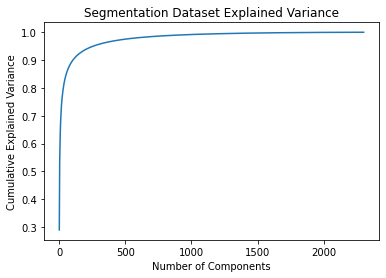

In [ ]:
# Fitting the PCA algorithm with our Data
pca = PCA()
pca.fit(X)
# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')  # for each component
plt.title('Segmentation Dataset Explained Variance')
plt.show(block=True)

In [ ]:
def applyrandomforest(X, X_test, y_train, y_test):
    """
        Apply Random forest on input dataset.
    """
    start = time.process_time()
    forest = RandomForestClassifier(n_estimators=700, max_features='sqrt', max_depth=15)
    forest.fit(X, y_train)
    print("Time Elapsed: %s secs" % (time.process_time() - start))
    prediction = forest.predict(X_test)
    print("Classification Report after applying Random Forest: ")
    print("----------------------------------------------------")
    print(classification_report(y_test, prediction))



In [ ]:
# applico randomforest su dati ottenuti con pca

pca = PCA(n_components=500)
pca.fit(X)
trainX_pca = pca.transform(X)
testX_pca = pca.transform(X_test)
applyrandomforest(trainX_pca, testX_pca, y_train, y_test)

Time Elapsed: 610.9623851050001 secs
Classification Report after applying Random Forest: 
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.39      0.56       958
           1       1.00      0.45      0.62       111
           2       0.95      0.46      0.62      1024
           3       0.41      0.99      0.58      1774
           4       0.86      0.45      0.60      1233
           5       0.89      0.49      0.63      1247
           6       0.95      0.71      0.81       831

    accuracy                           0.61      7178
   macro avg       0.86      0.56      0.63      7178
weighted avg       0.79      0.61      0.62      7178



In [ ]:
# applico randomforest su dati ottenuti con lda

lda = LinearDiscriminantAnalysis()
lda.fit(X, y_train)
trainX_lda = lda.transform(X)
testX_lda = lda.transform(X_test)
applyrandomforest(trainX_lda, testX_lda, y_train, y_test)

Time Elapsed: 64.79776837600002 secs
Classification Report after applying Random Forest: 
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.41      0.45       958
           1       0.85      0.67      0.75       111
           2       0.56      0.44      0.49      1024
           3       0.59      0.73      0.65      1774
           4       0.50      0.52      0.51      1233
           5       0.52      0.54      0.53      1247
           6       0.73      0.67      0.70       831

    accuracy                           0.57      7178
   macro avg       0.61      0.57      0.58      7178
weighted avg       0.57      0.57      0.56      7178



In [ ]:
print(np.shape(trainX_lda))
print(np.shape(testX_lda))

(31805, 6)
(7178, 6)


In [ ]:
#np.save('features_train_lda.npy',trainX_lda)
#np.save('features_test_lda.npy',testX_lda)